In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from collections import defaultdict
import pickle
import os
import matplotlib.pyplot as plt
import glob
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
MODEL_DATA_DIR = "/content/drive/MyDrive/4995AML/Applied ML Group 18/model_data/"
X_TRAIN2_FILE = MODEL_DATA_DIR + 'x_train_2.csv'
Y_TRAIN2_FILE = MODEL_DATA_DIR + 'y_train_2.csv'
X_TEST2_FILE = MODEL_DATA_DIR + 'x_test_2.csv'
Y_TEST2_FILE = MODEL_DATA_DIR + 'y_test_2.csv'
LABEL_MAP_FILE = MODEL_DATA_DIR +  'label_map.csv'

X_train2 = pd.read_csv(X_TRAIN2_FILE, index_col=0)
y_train2 = pd.read_csv(Y_TRAIN2_FILE, index_col=0)
X_test2 = pd.read_csv(X_TEST2_FILE, index_col=0)
y_test2 = pd.read_csv(Y_TEST2_FILE, index_col=0)
LABEL_MAP = pd.read_csv(LABEL_MAP_FILE)

X_train2.head()

,Age,Hours per day,Anxiety,Depression,Insomnia,OCD,Frequency [Classical] ordinal,Frequency [Country] ordinal,Frequency [EDM] ordinal,Frequency [Folk] ordinal,...,Exploratory ordinal,Music effects ordinal,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,Primary streaming service_Spotify,Primary streaming service_YouTube Music,Foreign languages_No,Foreign languages_Yes
0,22,2,7,7,8,3,1,0,1,1,...,1,1,0,0,0,0,0,1,1,0
1,18,2,5,7,2,0,2,1,2,0,...,0,1,0,0,0,0,1,0,1,0
2,31,2,8,9,6,2,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,17,3,8,10,9,2,1,1,0,2,...,0,1,1,0,0,0,0,0,1,0
4,18,3,8,9,0,0,1,0,0,2,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
X_train2 = np.asarray(X_train2)
y_train2 = np.asarray(y_train2['Fav genre'])
X_test2 = np.asarray(X_test2)
y_test2 = np.asarray(y_test2['Fav genre'])

X_train2

array([[22,  2,  7, ...,  1,  1,  0],
       [18,  2,  5, ...,  0,  1,  0],
       [31,  2,  8, ...,  0,  1,  0],
       ...,
       [17,  9,  3, ...,  0,  0,  0],
       [17, 10,  2, ...,  0,  0,  0],
       [17, 10,  2, ...,  0,  0,  0]])

In [ ]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train2.shape[1],)),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(np.unique(y_train2)), activation='softmax')
])

In [ ]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
trainModel = model.fit(X_train2, y_train2, epochs=30, validation_split=0.2)

Epoch 1/30
60/60 [==============================] - 2s 6ms/step - loss: 1.2459 - accuracy: 0.6329 - val_loss: 2.9487 - val_accuracy: 0.0755
Epoch 2/30
60/60 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.8159 - val_loss: 2.9826 - val_accuracy: 0.0922
Epoch 3/30
60/60 [==============================] - 0s 3ms/step - loss: 0.4894 - accuracy: 0.8411 - val_loss: 2.5099 - val_accuracy: 0.2348
Epoch 4/30
60/60 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8668 - val_loss: 1.6377 - val_accuracy: 0.4067
Epoch 5/30
60/60 [==============================] - 0s 4ms/step - loss: 0.3778 - accuracy: 0.8799 - val_loss: 1.4997 - val_accuracy: 0.5136
Epoch 6/30
60/60 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.8857 - val_loss: 1.4366 - val_accuracy: 0.5241
Epoch 7/30
60/60 [==============================] - 0s 3ms/step - loss: 0.2782 - accuracy: 0.9019 - val_loss: 1.4560 - val_accuracy: 0.4885
Epoch 8/30
60/60 [==

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test2, y_test2)
print("Test Accuracy:", test_accuracy)

5/5 [==============================] - 0s 3ms/step - loss: 2.5687 - accuracy: 0.5274
Test Accuracy: 0.5273972749710083


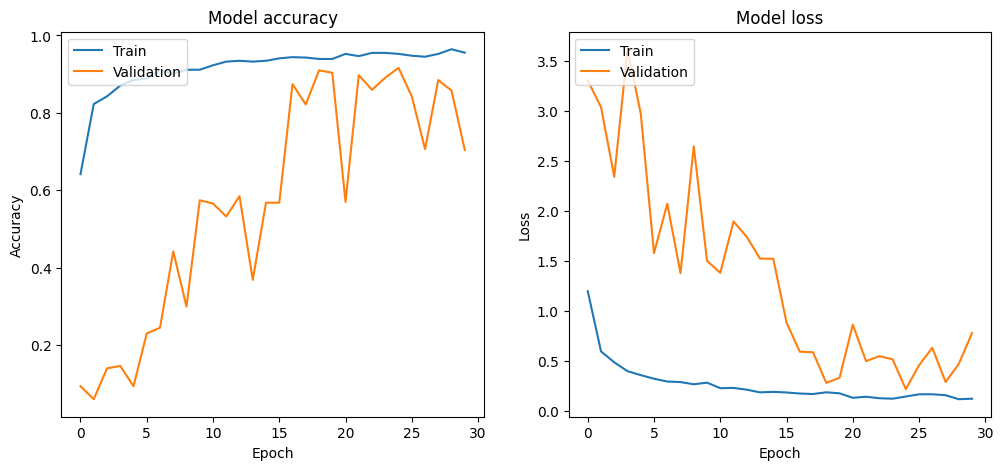

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(trainModel.history['accuracy'])
plt.plot(trainModel.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(trainModel.history['loss'])
plt.plot(trainModel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG

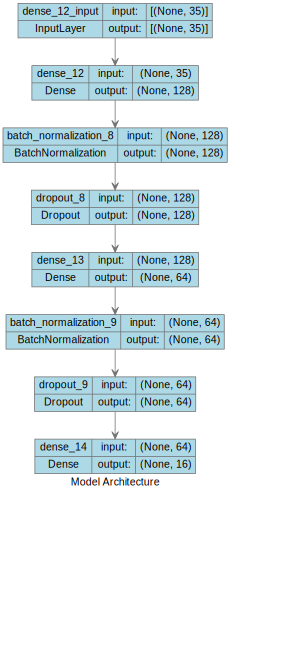

In [ ]:
dot = model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='TB', dpi=96)

styles = {
    'graph': {
        'label': 'Model Architecture',
        'bgcolor': '#FFFFFF',
        'fontname': 'Helvetica'
    },
    'nodes': {
        'style': 'filled',
        'fillcolor': '#ADD8E6',
        'color': '#707070',
        'fontname': 'Helvetica'
    },
    'edges': {
        'color': '#707070',
        'arrowhead': 'open',
        'fontname': 'Helvetica'
    }
}

def apply_styles(graph, styles):
    graph.set_graph_defaults(**styles['graph'])
    for node in graph.get_nodes():
        node.set_fillcolor(styles['nodes']['fillcolor'])
        node.set_style(styles['nodes']['style'])
        node.set_color(styles['nodes']['color'])
        node.set_fontname(styles['nodes']['fontname'])
    for edge in graph.get_edges():
        edge.set_color(styles['edges']['color'])
        edge.set_arrowhead(styles['edges']['arrowhead'])
        edge.set_fontname(styles['edges']['fontname'])

apply_styles(dot, styles)
SVG(dot.create(prog='dot', format='svg'))